In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ast import literal_eval
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt             #visualisation
import seaborn as sns

color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 

# Objective: 
1. Which products are frequently bought together?
2. If someone buys a product, which product is he/she likely to buy next?

In [3]:
df = pd.read_csv('../Data Science/Kaggle_Data/Groceries_dataset.csv')

df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Data Cleaning

In [4]:
dc_grocery = df.copy()

# Rename Columns
dc_grocery.rename(columns={"Member_number": "Member_Number","itemDescription":"Item"}, inplace=True)

# Check Null Values
dc_grocery.isnull().sum()

Member_Number    0
Date             0
Item             0
dtype: int64

In [5]:
print("Rows before remove duplicates " + str(len(dc_grocery)))
print("Rows after remove duplicates " + str(len(dc_grocery.drop_duplicates())))
dc_grocery = dc_grocery.drop_duplicates()

Rows before remove duplicates 38765
Rows after remove duplicates 38006


In [6]:
# Object Types
dc_grocery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_Number  38006 non-null  int64 
 1   Date           38006 non-null  object
 2   Item           38006 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


# EDA

In [7]:
def set_custom_palette(series, max_color = 'blue', other_color = 'lightgrey'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

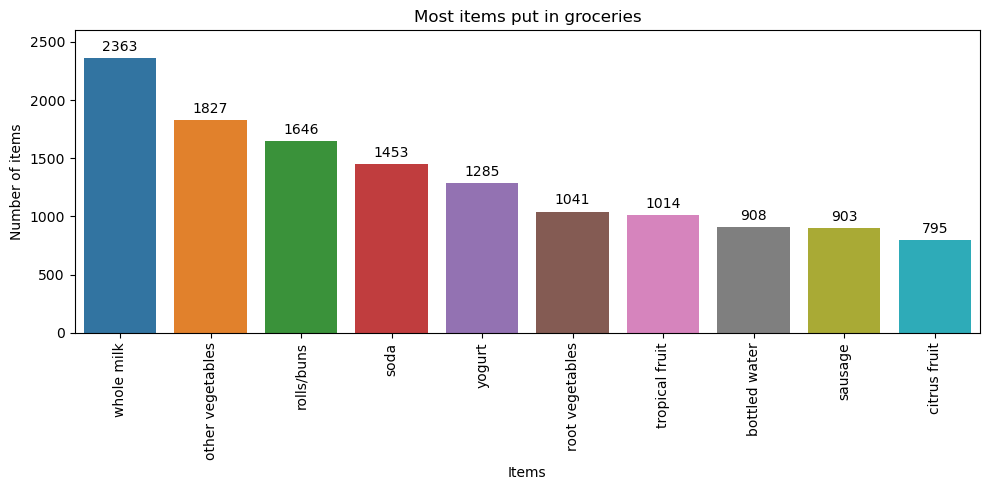

In [8]:
y = dc_grocery.Item.value_counts().nlargest(10).tolist()
x = dc_grocery.Item.value_counts().nlargest(10).keys().tolist()

plt.rcParams['figure.figsize'] = (10, 5)

fig, ax = plt.subplots()

sns.barplot(x=x, y=y, ax=ax)

ax.bar_label(ax.containers[0], labels=y, padding=3)
ax.margins(y=0.1)

plt.title("Most items put in groceries")
plt.ylabel('Number of items')
plt.xlabel('Items')
plt.xticks(rotation='vertical')

fig.tight_layout()

In [9]:
top_5_sum = dc_grocery.Item.value_counts().nlargest(5).sum()
sum_all = dc_grocery.Item.value_counts().sum()
summ = top_5_sum/sum_all
summ

0.22559595853286324

# Data Analysis

In [10]:
basket = (dc_grocery.groupby(['Member_Number','Item'])['Date'].count().unstack().reset_index().fillna(0).set_index('Member_Number'))
basket.head()

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_Number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [11]:
def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)
basket.head(10)

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_Number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
#Run apriori algorithm
df_trans = pd.DataFrame(basket)

frequent_itemsets = apriori(df_trans, min_support=0.1, use_colnames=True).sort_values(by="support", ascending=False)
frequent_itemsets

D:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
27,0.458184,(whole milk)
16,0.376603,(other vegetables)
20,0.349666,(rolls/buns)
24,0.313494,(soda)
28,0.282966,(yogurt)
25,0.233710,(tropical fruit)
21,0.230631,(root vegetables)
2,0.213699,(bottled water)
22,0.206003,(sausage)
32,0.191380,"(whole milk, other vegetables)"


In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[(rules['confidence'] > 0.5)]

rules.sort_values(['confidence'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
1,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
2,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
3,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
4,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802


In [14]:
def frequently_bought_together(item):
    
    # df of item passed
    item_df = basket.loc[basket[item]==1]
    
    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.1, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
    rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))

    rules = rules[(rules['antecedent_len'] == 1) & (rules['consequents_len'] == 1) & (rules['lift'] > 1)]
    
    # Sorting on lift and support
    rules.sort_values(['confidence'],ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    bt = rules['consequents'].drop_duplicates()
    
    # Returning top 6 items with highest lift and support
    return bt

In [15]:
frequently_bought_together('yogurt')

Items frequently bought together with yogurt


D:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


4     (other vegetables)
5        (bottled water)
6           (whole milk)
14         (canned beer)
23        (citrus fruit)
48          (rolls/buns)
51     (root vegetables)
53             (sausage)
55                (soda)
57      (tropical fruit)
63              (pastry)
66           (pip fruit)
95       (shopping bags)
Name: consequents, dtype: object